In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [4]:
dates = pd.date_range('20130101', periods=6)
print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [5]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
print(df)

                   A         B         C         D
2013-01-01  2.591541 -1.161477  0.402645 -0.608162
2013-01-02 -1.191971  0.681886 -0.932331  0.023065
2013-01-03  0.309935  0.276855 -1.181717 -0.148138
2013-01-04  0.153644 -0.128013 -0.619027 -0.941713
2013-01-05  0.552566 -0.961180 -2.291392 -0.526882
2013-01-06  0.238104 -0.154102  0.780129  0.784883


In [7]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [8]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [9]:
df.tail(3)  # 끝에서 마지막 3줄을 불러옴
df.tail()  # 끝에서 마지막 5줄 불러옴
df.head()

,A,B,C,D
2013-01-01,2.591541,-1.161477,0.402645,-0.608162
2013-01-02,-1.191971,0.681886,-0.932331,0.023065
2013-01-03,0.309935,0.276855,-1.181717,-0.148138
2013-01-04,0.153644,-0.128013,-0.619027,-0.941713
2013-01-05,0.552566,-0.961180,-2.291392,-0.526882


In [10]:
df.index
df.columns
df.values
df.describe()
df.T
df.sort_index(axis=1, ascending=False)
df.sort_values(by='B')

,A,B,C,D
2013-01-01,2.591541,-1.161477,0.402645,-0.608162
2013-01-05,0.552566,-0.961180,-2.291392,-0.526882
2013-01-06,0.238104,-0.154102,0.780129,0.784883
2013-01-04,0.153644,-0.128013,-0.619027,-0.941713
2013-01-03,0.309935,0.276855,-1.181717,-0.148138
2013-01-02,-1.191971,0.681886,-0.932331,0.023065


In [11]:
df['A']
df[0:3]
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.191971,0.681886,-0.932331,0.023065
2013-01-03,0.309935,0.276855,-1.181717,-0.148138
2013-01-04,0.153644,-0.128013,-0.619027,-0.941713


In [12]:
df.loc[dates[0]]
df.loc[:,['A','B']]
df.loc['20130102':'20130104', ['A','B']]
df.loc['20130102',['A','B']]

df.loc[dates[0],'A']
df.at[dates[0],'A']

2.5915409069289552

In [13]:
df.iloc[3]
df.iloc[3:5,0:2]
df.iloc[[1,2,4],[0,2]]
df.iloc[1:3,:]
df.iloc[:,1:3]
df.iloc[1,1]
df.iat[1,1]

0.6818855129752918

In [16]:
df[df.A > 0]
df[df>0]
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
print(df2)
df2[df2['E'].isin(['two','four'])]

                   A         B         C         D      E
2013-01-01  2.591541 -1.161477  0.402645 -0.608162    one
2013-01-02 -1.191971  0.681886 -0.932331  0.023065    one
2013-01-03  0.309935  0.276855 -1.181717 -0.148138    two
2013-01-04  0.153644 -0.128013 -0.619027 -0.941713  three
2013-01-05  0.552566 -0.961180 -2.291392 -0.526882   four
2013-01-06  0.238104 -0.154102  0.780129  0.784883  three


,A,B,C,D,E
2013-01-03,0.309935,0.276855,-1.181717,-0.148138,two
2013-01-05,0.552566,-0.961180,-2.291392,-0.526882,four


In [17]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
print(s1)

df['F'] = s1
df.at[dates[0],'A'] = 0

df.iat[0,1] = 0

df.loc[:,'D'] = np.array([5] * len(df))

print(df)

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64
                   A         B         C  D    F
2013-01-01  0.000000  0.000000  0.402645  5  NaN
2013-01-02 -1.191971  0.681886 -0.932331  5  1.0
2013-01-03  0.309935  0.276855 -1.181717  5  2.0
2013-01-04  0.153644 -0.128013 -0.619027  5  3.0
2013-01-05  0.552566 -0.961180 -2.291392  5  4.0
2013-01-06  0.238104 -0.154102  0.780129  5  5.0


In [18]:
df2 = df.copy()
df2[df2 > 0] = -df2
print(df)

                   A         B         C  D    F
2013-01-01  0.000000  0.000000  0.402645  5  NaN
2013-01-02 -1.191971  0.681886 -0.932331  5  1.0
2013-01-03  0.309935  0.276855 -1.181717  5  2.0
2013-01-04  0.153644 -0.128013 -0.619027  5  3.0
2013-01-05  0.552566 -0.961180 -2.291392  5  4.0
2013-01-06  0.238104 -0.154102  0.780129  5  5.0


In [19]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
print(df1)

                   A         B         C  D    F    E
2013-01-01  0.000000  0.000000  0.402645  5  NaN  1.0
2013-01-02 -1.191971  0.681886 -0.932331  5  1.0  1.0
2013-01-03  0.309935  0.276855 -1.181717  5  2.0  NaN
2013-01-04  0.153644 -0.128013 -0.619027  5  3.0  NaN


In [20]:
df1.dropna(how='any')
df1.fillna(value=5)
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [21]:
df.mean()
df.mean(1)
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
print(s)

df.sub(s, axis='index')

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64


,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.690065,-0.723145,-2.181717,4.0,1.0
2013-01-04,-2.846356,-3.128013,-3.619027,2.0,0.0
2013-01-05,-4.447434,-5.961180,-7.291392,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [22]:
df.apply(np.cumsum)
df.apply(lambda x: x.max() - x.min())

A    1.744537
B    1.643065
C    3.071521
D    0.000000
F    4.000000
dtype: float64

In [23]:
s = pd.Series(np.random.randint(0, 7, size=10))
print(s)
s.value_counts()

0    6
1    5
2    1
3    4
4    0
5    3
6    4
7    1
8    0
9    0
dtype: int64


0    3
4    2
1    2
6    1
5    1
3    1
dtype: int64

In [24]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [25]:
df = pd.DataFrame(np.random.randn(10, 4))
print(df)

          0         1         2         3
0  0.800455  0.539381  1.808030  0.568993
1 -1.333909 -0.301628  0.474609 -0.422718
2  0.674783 -0.994052 -1.560802 -0.656386
3  0.258101 -0.431632 -0.224059  0.040004
4 -0.558166  0.116799 -0.633623  1.025832
5 -0.332982 -0.348198  0.844675 -0.247954
6 -0.657377 -1.063216 -0.387621 -1.058671
7 -0.062356 -0.229464 -0.895389 -2.456843
8 -0.953762  0.002145  1.214100 -0.060510
9 -0.410136 -1.994690 -1.321910 -0.288153


In [26]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.800455,0.539381,1.808030,0.568993
1,-1.333909,-0.301628,0.474609,-0.422718
2,0.674783,-0.994052,-1.560802,-0.656386
3,0.258101,-0.431632,-0.224059,0.040004
4,-0.558166,0.116799,-0.633623,1.025832
5,-0.332982,-0.348198,0.844675,-0.247954
6,-0.657377,-1.063216,-0.387621,-1.058671
7,-0.062356,-0.229464,-0.895389,-2.456843
8,-0.953762,0.002145,1.214100,-0.060510
9,-0.410136,-1.994690,-1.321910,-0.288153


In [27]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
print(left)
print(right)

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


In [28]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [29]:
left = pd.DataFrame({'key' : ['foo', 'bar'], 'lval' : [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(left)
print(right)

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


In [30]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [31]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
print(df)

          A         B         C         D
0 -0.804402  0.436064  0.676505 -1.066803
1  0.499258 -0.483072  0.814648 -0.762053
2  0.483697 -0.077202 -1.164812 -0.674209
3  1.884504 -0.463852  0.322333  0.841978
4  0.024230 -2.018254  0.314734  0.319451
5 -0.111641 -1.614621 -0.161228  0.219043
6 -0.636821  0.680145 -1.129996 -0.152189
7  2.631582 -1.557254  0.602210  1.496692


In [32]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.804402,0.436064,0.676505,-1.066803
1,0.499258,-0.483072,0.814648,-0.762053
2,0.483697,-0.077202,-1.164812,-0.674209
3,1.884504,-0.463852,0.322333,0.841978
4,0.024230,-2.018254,0.314734,0.319451
5,-0.111641,-1.614621,-0.161228,0.219043
6,-0.636821,0.680145,-1.129996,-0.152189
7,2.631582,-1.557254,0.602210,1.496692
8,1.884504,-0.463852,0.322333,0.841978


In [33]:
df = pd.DataFrame(
    {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    })
print(df)

     A      B         C         D
0  foo    one -1.322881  0.749267
1  bar    one  1.298875 -0.623345
2  foo    two -0.755038 -0.861931
3  bar  three -1.417514  1.653286
4  foo    two -1.139832  0.310517
5  bar    two  0.093091 -1.585636
6  foo    one  1.873000 -1.366051
7  foo  three  1.145640  0.338352


In [34]:
df.groupby('A').sum()
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.298875 -0.623345
    three -1.417514  1.653286
    two    0.093091 -1.585636
foo one    0.550119 -0.616784
    three  1.145640  0.338352
    two   -1.894871 -0.551414

In [35]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2  =  df[:4]
print(df2)

                     A         B
first second                    
bar   one     0.889971  0.952066
      two    -1.164546  0.763989
baz   one    -0.204828 -0.705014
      two    -0.221521 -0.706157


In [36]:
stacked = df2.stack()
print(stacked)

first  second   
bar    one     A    0.889971
               B    0.952066
       two     A   -1.164546
               B    0.763989
baz    one     A   -0.204828
               B   -0.705014
       two     A   -0.221521
               B   -0.706157
dtype: float64


In [37]:
stacked.unstack()
stacked.unstack(1)
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.889971 -0.204828
       B  0.952066 -0.705014
two    A -1.164546 -0.221521
       B  0.763989 -0.706157

In [39]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
print(df)

        A  B    C         D         E
0     one  A  foo -0.486621 -0.027875
1     one  B  foo -1.193046  0.210370
2     two  C  foo -1.151385  0.438959
3   three  A  bar -1.104701  0.431271
4     one  B  bar -1.073395 -0.750386
5     one  C  bar  1.895945 -0.293511
6     two  A  foo -0.432926  1.135301
7   three  B  foo  0.228023 -0.331472
8     one  C  foo  0.076019  0.419289
9     one  A  bar  0.545725 -0.578028
10    two  B  bar -0.133316  0.484405
11  three  C  bar -1.206227  2.084604


In [40]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.545725 -0.486621
      B -1.073395 -1.193046
      C  1.895945  0.076019
three A -1.104701       NaN
      B       NaN  0.228023
      C -1.206227       NaN
two   A       NaN -0.432926
      B -0.133316       NaN
      C       NaN -1.151385

In [41]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    24213
Freq: 5T, dtype: int64

In [42]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts)

2012-03-06    0.242210
2012-03-07    0.473661
2012-03-08   -0.703076
2012-03-09   -0.589448
2012-03-10   -0.035567
Freq: D, dtype: float64


In [43]:
ts_utc = ts.tz_localize('UTC')
print(ts_utc)

2012-03-06 00:00:00+00:00    0.242210
2012-03-07 00:00:00+00:00    0.473661
2012-03-08 00:00:00+00:00   -0.703076
2012-03-09 00:00:00+00:00   -0.589448
2012-03-10 00:00:00+00:00   -0.035567
Freq: D, dtype: float64


In [44]:
ts_utc.tz_convert('US/Eastern')
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)

2012-01-31    0.474994
2012-02-29    1.207909
2012-03-31    1.104202
2012-04-30   -0.452153
2012-05-31    0.555047
Freq: M, dtype: float64


In [45]:
ps = ts.to_period()
print(ps)
ps.to_timestamp()

2012-01    0.474994
2012-02    1.207909
2012-03    1.104202
2012-04   -0.452153
2012-05    0.555047
Freq: M, dtype: float64


2012-01-01    0.474994
2012-02-01    1.207909
2012-03-01    1.104202
2012-04-01   -0.452153
2012-05-01    0.555047
Freq: MS, dtype: float64

In [46]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    1.309835
1990-06-01 09:00   -1.014790
1990-09-01 09:00   -0.473751
1990-12-01 09:00    0.471507
1991-03-01 09:00    0.087049
Freq: H, dtype: float64

In [48]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

df["grade"] = df["raw_grade"].astype("category")
print(df["grade"])

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']


In [49]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
print(df["grade"])

df.sort_values(by="grade")
df.groupby("grade").size()

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']


grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

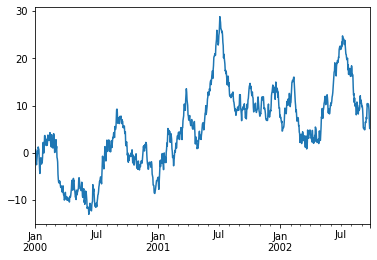

In [50]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

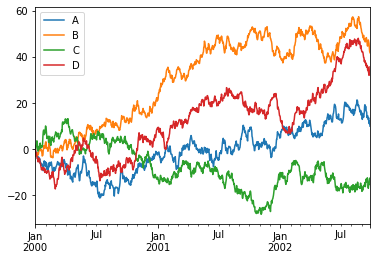

In [51]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])  
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

In [52]:
df.to_csv('foo.csv')

In [53]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.303678,-1.316661,-0.320256,-0.061184
1,2000-01-02,-1.211598,-3.183227,-0.430896,-0.258031
2,2000-01-03,-1.482009,-1.756801,0.805154,-1.322816
3,2000-01-04,-1.971598,-2.397545,1.777169,-1.555559
4,2000-01-05,-1.613931,-2.898665,1.728206,-2.432882
...,...,...,...,...,...
995,2002-09-22,13.599876,46.480669,-15.194943,33.335660
996,2002-09-23,11.177231,45.809404,-15.325995,31.984447
997,2002-09-24,11.059243,44.206168,-14.109923,32.382651
998,2002-09-25,12.339724,42.267698,-12.505505,33.493514


In [54]:
df.to_hdf('foo.h5','df')

In [55]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-0.303678,-1.316661,-0.320256,-0.061184
2000-01-02,-1.211598,-3.183227,-0.430896,-0.258031
2000-01-03,-1.482009,-1.756801,0.805154,-1.322816
2000-01-04,-1.971598,-2.397545,1.777169,-1.555559
2000-01-05,-1.613931,-2.898665,1.728206,-2.432882
...,...,...,...,...
2002-09-22,13.599876,46.480669,-15.194943,33.335660
2002-09-23,11.177231,45.809404,-15.325995,31.984447
2002-09-24,11.059243,44.206168,-14.109923,32.382651
2002-09-25,12.339724,42.267698,-12.505505,33.493514


In [56]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [57]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.303678,-1.316661,-0.320256,-0.061184
1,2000-01-02,-1.211598,-3.183227,-0.430896,-0.258031
2,2000-01-03,-1.482009,-1.756801,0.805154,-1.322816
3,2000-01-04,-1.971598,-2.397545,1.777169,-1.555559
4,2000-01-05,-1.613931,-2.898665,1.728206,-2.432882
...,...,...,...,...,...
995,2002-09-22,13.599876,46.480669,-15.194943,33.335660
996,2002-09-23,11.177231,45.809404,-15.325995,31.984447
997,2002-09-24,11.059243,44.206168,-14.109923,32.382651
998,2002-09-25,12.339724,42.267698,-12.505505,33.493514


In [60]:
if pd.Series([False, True, False])is not None:
      print("I was not None")

I was not None
